In [158]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as ss

In [159]:
mpl.rcParams['figure.dpi'] *= 2

In [160]:
rng = np.random.default_rng()

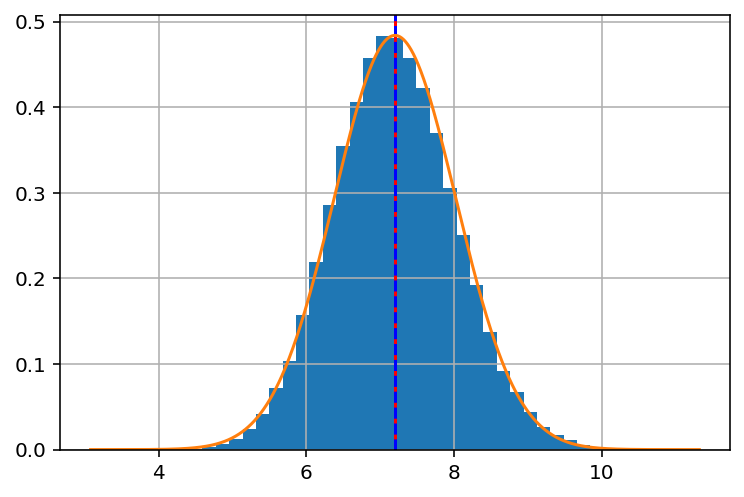

In [161]:

# means
R0 = 160/100 # TES resistance (mOhm)
b0 = 2.5 # beta

# std devs
dR = R0/10
db = b0/10

# typical ranges
Rm_space = dR*np.linspace(-5, 5, 1000) + R0
bm_space = db*np.linspace(-5, 5, 1000) + b0

def R(N = 100):
    return rng.normal(loc = R0, scale = dR, size = N)

def b(N = 100):
    return rng.normal(loc = b0, scale = db, size = N)

def normal(x, mu, sig):
    return np.exp(-(x-mu)**2/2/sig**2)/np.sqrt(2*np.pi)/sig

def Rnormal(x):
    return normal(x, R0, dR)
def bnormal(x):
    return normal(x, b0, db)


N = 100_000
Rbs = R(N)*(2+b(N))

# combined params
Rb0 = R0*(2 + b0)
dRb = np.sqrt(dR**2*db**2 + dR**2*(2+b0)**2 + db**2*R0**2)

xs = dRb*np.linspace(-5, 5, 1000) + Rb0

Rb_dist= normal(xs, Rb0, dRb)

plt.figure()
plt.grid()
plt.hist(Rbs, density = True, bins = 40)
plt.axvline(Rb0, color = 'r')
plt.axvline(Rbs.mean(), color = 'b', linestyle = '--')
plt.plot(xs, Rb_dist)

In [206]:

def show_approx(R0 = 2.5, b0 = 0.5, rel_dR = 0.1, rel_db = 0.1):
    # means
    #R0 = TES resistance (mOhm)
    #b0 = beta


    dR = R0*rel_dR
    db = b0*rel_db

    # typical ranges
    #Rm_space = dR*np.linspace(-5, 5, 1000) + R0
    #bm_space = db*np.linspace(-5, 5, 1000) + b0

    def R(N = 100):
        return rng.normal(loc = R0, scale = dR, size = N)

    def b(N = 100):
        return rng.normal(loc = b0, scale = db, size = N)

    N = 1000_000
    Rbs = R(N)*(2+b(N))

    # combined params
    Rb0 = R0*(2 + b0)
    dRb = np.sqrt(dR**2*db**2 + dR**2*(2+b0)**2 + db**2*R0**2)

    xs = dRb*np.linspace(-5, 5, 1000) + Rb0

    Rb_dist= normal(xs, Rb0, dRb)

    plt.figure()
    plt.title(f'$\\beta = {b0}$, $\\Delta\\beta/\\beta = ${rel_db*100:.0f}%')
    plt.grid()
    plt.hist(Rbs, density = True, bins = 100, label = f'simulation\n({N:.0g} samples)')
    plt.axvline(Rb0, color = 'r', label = 'predicted mean')
    plt.axvline(Rbs.mean(), color = 'b', linestyle = '--', label = 'sample mean')
    plt.plot(xs, Rb_dist, label = 'gaussian approx')
    plt.legend()
    plt.xlabel('$R_m(2+\\beta_m)$')

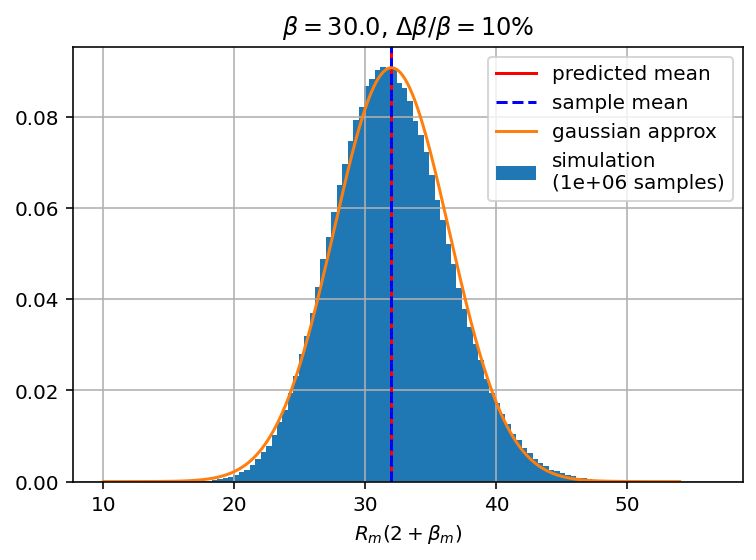

In [207]:
show_approx(R0 = 1, b0 = 30., rel_db = 0.1)

In [208]:

def show_dist(R0 = 2.5, b0 = 0.5, rel_dR = 0.1, rel_db = 0.1, M = 100, dv = 0.01):
    # means
    #R0 = TES resistance (mOhm)
    #b0 = beta

    vm = rng.normal(loc = 1, scale = dv, size = (M,1))
    #vm = 2*rng.random(size = (M,1))

    #vm = rng.choice((-1,1), size = (M,1))*rng.normal(loc = dv, scale = 0.1*dv, size = (M,1))

    #vm /= vm.mean()


    dR = R0*rel_dR
    db = b0*rel_db

    # typical ranges
    #Rm_space = dR*np.linspace(-5, 5, 1000) + R0
    #bm_space = db*np.linspace(-5, 5, 1000) + b0

    def R(N = 100):
        return rng.normal(loc = R0, scale = dR, size = (M,N))

    def b(N = 100):
        return rng.normal(loc = b0, scale = db, size = (M,N))

    N = 1000_000
    Rbs = (vm*R(N)*(2+b(N))).sum(axis = 0)/vm.sum()

    # combined params
    Rb0 = R0*(2 + b0)
    D2 = dR**2*db**2 + dR**2*(2+b0)**2 + db**2*R0**2

    var = (1 + dv**2)*D2/M

    xs = np.sqrt(var)*np.linspace(-5, 5, 1000) + Rb0

    Rb_dist = normal(xs, Rb0, np.sqrt(var))
    Rb_dist2 = normal(xs, Rb0, np.sqrt(D2/M))

    plt.figure()
    plt.title(f'$\\beta = {b0}$, $\\Delta\\beta/\\beta = ${rel_db*100:.0f}%, $\\delta v = ${dv*100:.0f}%')
    plt.grid()
    plt.hist(Rbs, density = True, bins = 100, label = f'simulation\n({N:.0g} samples)')
    plt.axvline(Rb0, color = 'r', label = 'predicted mean')
    plt.axvline(Rbs.mean(), color = 'b', linestyle = '--', label = 'sample mean')
    plt.plot(xs, Rb_dist, label = 'gaussian approx')
    plt.plot(xs, Rb_dist2, label = 'approx w/ zero dv')
    plt.legend()
    plt.xlabel('$\sum_mv_mR_m(2+\\beta_m)/\\sum_mv_m$')

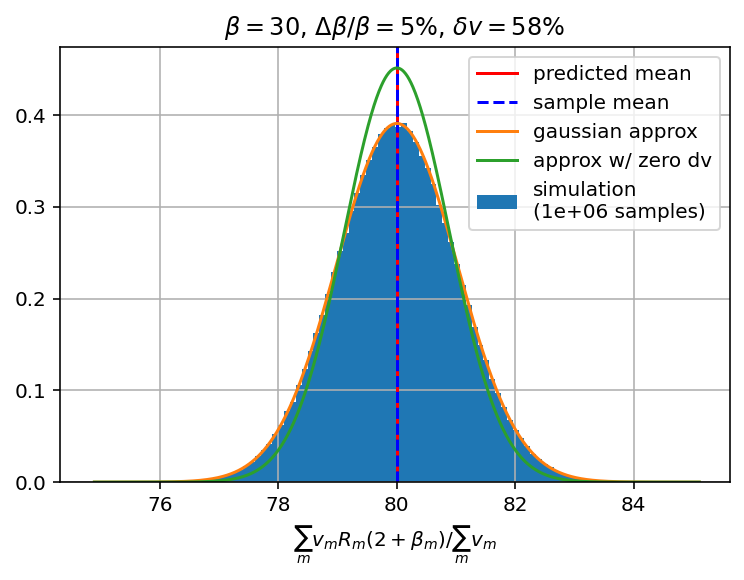

In [209]:
show_dist(b0 = 30, rel_db = 0.05, dv = np.sqrt(1/3))

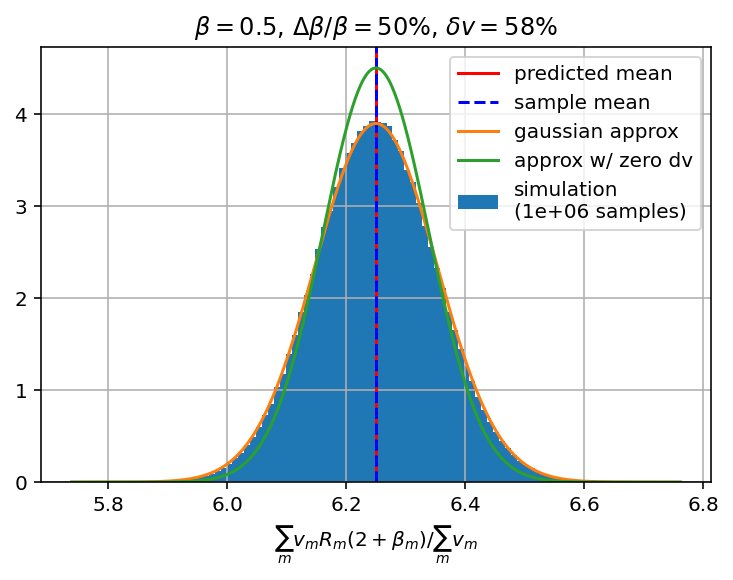

In [210]:
show_dist(b0 = 0.5, rel_db = 0.5, dv = np.sqrt(1/3))# 0.5

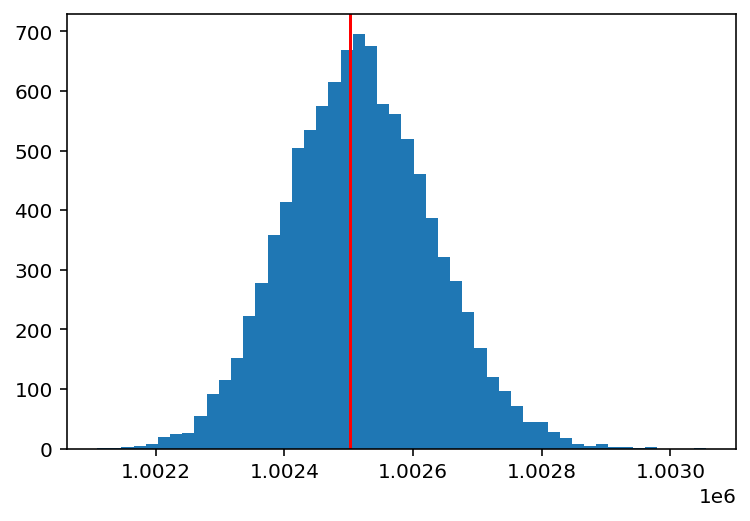

In [303]:
def get_thing(M = 10_000, dv = 0.01):

    #vm = rng.choice((-1,1), size = M)*rng.random(size = M)
    #vm = rng.choice((-1,1), size = M)*(rng.standard_normal(size = M)+1)
    vm = rng.normal(loc = 1, scale = dv, size = M)
    #vm = rng.random(size = M)

    return (1/vm).sum(axis = 0)*vm.sum(axis = 0)


M = 1000
trials = 10_000
dv = 0.05

plt.hist(get_thing((M, trials), dv = dv), bins = 50)
#plt.loglog()
plt.axvline(M**2*(1 + dv**2/2)**2, color = 'r')

(array([1.000e+00, 7.000e+00, 2.000e+01, 4.500e+01, 1.580e+02, 3.030e+02,
        4.880e+02, 6.200e+02, 8.310e+02, 9.830e+02, 9.960e+02, 1.057e+03,
        9.140e+02, 8.060e+02, 6.890e+02, 5.080e+02, 4.270e+02, 3.200e+02,
        2.610e+02, 1.730e+02, 1.310e+02, 8.700e+01, 5.000e+01, 3.000e+01,
        2.000e+01, 3.000e+01, 1.500e+01, 1.200e+01, 2.000e+00, 3.000e+00,
        2.000e+00, 5.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.70894423, 0.73417988, 0.75941553, 0.78465119, 0.80988684,
        0.8351225 , 0.86035815, 0.88559381, 0.91082946, 0.93606511,
        0.96130077, 0.98653642, 1.01177208, 1.03700773, 1.06224339,
        1.08747904, 1.11271469, 1.13795035, 1.163186  , 1.18842166,
        1.21365731, 1.23889297, 1.26412862, 1.28936427, 1.31459993,
        1.33983558, 1.36507124, 1.39030689, 1.41554255, 1.4407782 ,
        1.46601385, 1.49124951, 1.51648516, 1.54172082, 1.56695647,
        1.59219213, 1.6174

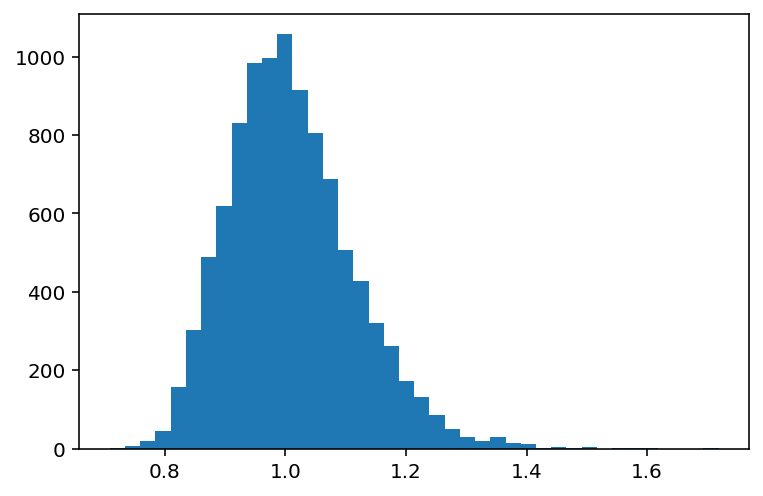

In [275]:
plt.hist(1/rng.normal(loc = 1, scale = 0.1, size = 10_000), bins = 40)

random matrix

In [ ]:
M = 300 # number of TES component heat capacities
N = 900 # number of external heat capacities

syst_params = {
    'I0': 80e-6 # equilibrium bias current (A)
    'L': 250e-9 # inductance (H)
    'Rmean': 160e-3/M, # mean component resistance R_{m,0} (Ohm)
    'Rdev': 0.01, # relative deviation in R_{m,0}
    'Cmean': 1e-15, # mean component heat capacity C_m (J/K)
    'Cdev': 0.01, # relative deviation in C_m
    'gmean': 1e-9, # mean thermal conductance g_{ij} (J/K)
    'gdev': 0.01, # relative deviation in g_{ij}
    'Bmean': 1, # mean beta_m (current responsivity)
    'Bdev': 0.01, # relative deviation in beta_m
    'Amean': 200, # mean alpha_m (thermal responsivity)
    'Adev': 0.01, # relative deviation in alpha_m
}

def get_M_matrix(M, N, I0, L, Rmean, Rdev, Cmean, Cdev, gmean, gdev, Bmean, Bdev, Amean, Adev):

    MATRIX = np.zeros((M+N+1, M+N+1))

    # component resistances
    R_m = rng.normal(loc = Rmean, scale = Rmean*Rdev, size = M) 

    # component heat capacities
    C_i = rng.normal(loc = Cmean, scale = Cmean*Cdev, size = (M+N)) 

    g_ij = rng.normal(loc = gmean, scale = gmean*gdev, size = (M+N,M+N)) # conductance matrix
    g_ij *= rng.random((g_ij.shape)) > 0.9 # mask most elements

    beta_m = rng.normal(loc = Bmean, scale = Bmean*Bdev, size = M)
    alpha_m = rng.normal(loc = Amean, scale = Amean*Adev)

    G_i = 

    Ell_m = 

    